# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import time
import requests
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
import requests
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0
    
    params = {
        "appid": weather_api_key,
        "q": city,
        "units": unit
    }
    
    try:
        response = requests.get(url, params=params).json()
        # Log the url, record, and set numbers
        print(f"Processing Record {record_count} of Set {set_count} | {city}")

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_info = {
            "City": city,
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        }
        
        city_data.append(city_info)
        
        # Add 1 to the record count
        record_count += 1
    except:
        print("City not found. Skipping...")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | peno
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | guerrero negro
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | dengzhou
Processing Record 9 of Set 1 | mont-joli
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | wenling
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | port macquarie
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | magadan
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | holualoa
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | fort st. john
Processing Record 22 of Set 1 | belmonte
Processing R

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())
city_data_df

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,peno,56.9262,32.7426,-2.30,91,100,4.84,RU,1698361996
1,east london,-33.0153,27.9116,20.41,89,77,0.70,ZA,1698362004
2,thompson,55.7435,-97.8558,-1.91,46,100,5.66,CA,1698362006
3,badger,64.8000,-147.5333,2.62,81,40,0.00,US,1698362007
4,guerrero negro,27.9769,-114.0611,20.61,63,2,7.66,MX,1698362007
...,...,...,...,...,...,...,...,...,...
554,kolonia,50.9333,6.9500,11.57,91,40,2.57,DE,1698362165
555,chernyshevskiy,63.0128,112.4714,-9.09,100,97,0.65,RU,1698362165
556,bryne,58.7354,5.6477,5.55,80,100,0.00,NO,1698362166
557,tofol,5.3248,163.0078,27.88,83,100,3.60,FM,1698362166


In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,peno,56.9262,32.7426,-2.30,91,100,4.84,RU,1698361996
1,east london,-33.0153,27.9116,20.41,89,77,0.70,ZA,1698362004
2,thompson,55.7435,-97.8558,-1.91,46,100,5.66,CA,1698362006
3,badger,64.8000,-147.5333,2.62,81,40,0.00,US,1698362007
4,guerrero negro,27.9769,-114.0611,20.61,63,2,7.66,MX,1698362007


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,peno,56.9262,32.7426,-2.30,91,100,4.84,RU,1698361996
1,east london,-33.0153,27.9116,20.41,89,77,0.70,ZA,1698362004
2,thompson,55.7435,-97.8558,-1.91,46,100,5.66,CA,1698362006
3,badger,64.8000,-147.5333,2.62,81,40,0.00,US,1698362007
4,guerrero negro,27.9769,-114.0611,20.61,63,2,7.66,MX,1698362007


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

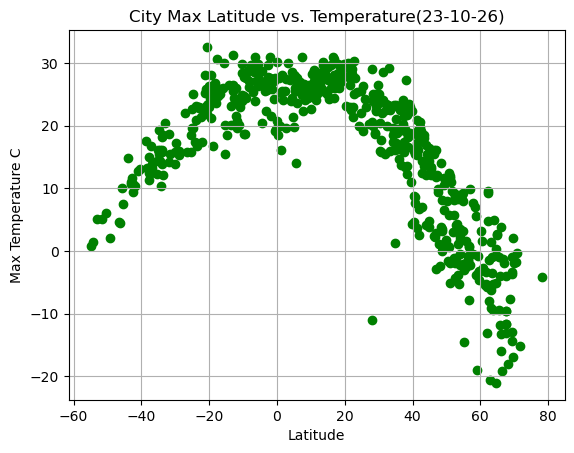

In [18]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],color="green",)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature(23-10-26)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

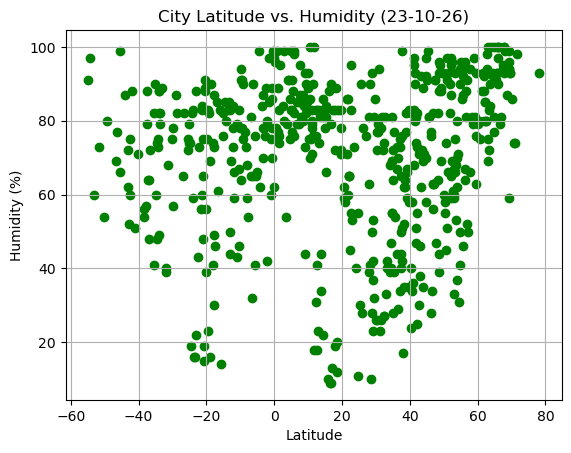

In [19]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],color="green")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (23-10-26)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

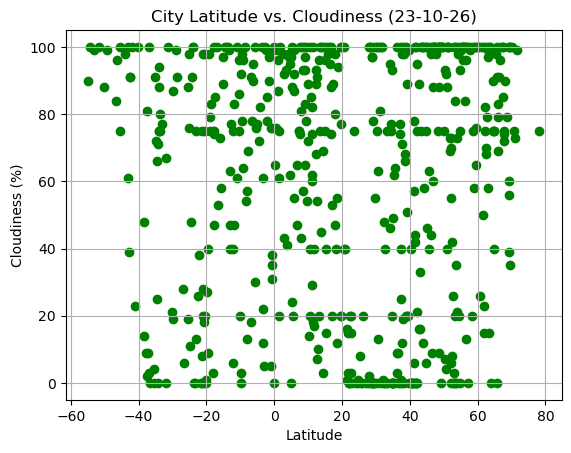

In [20]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],color="green")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (23-10-26)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

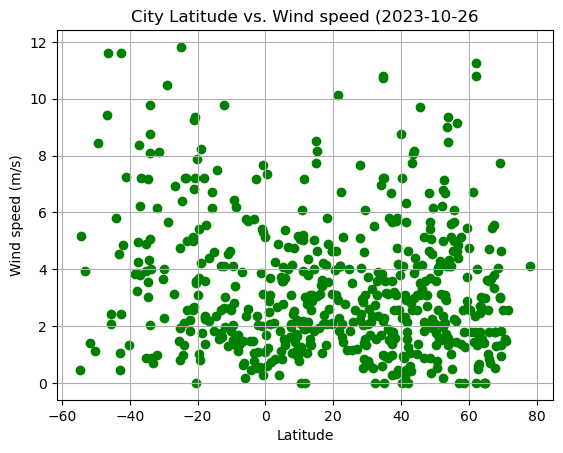

In [21]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],color="green")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind speed (2023-10-26")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


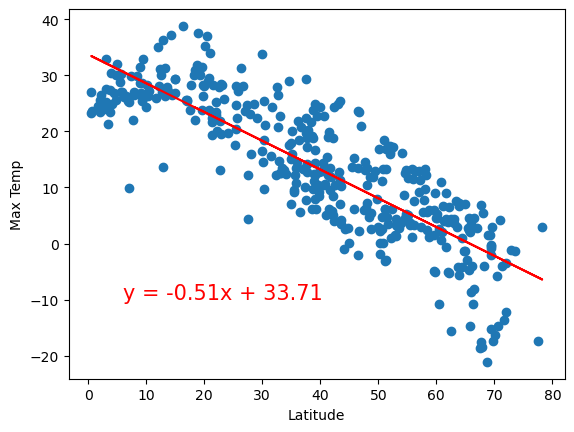

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


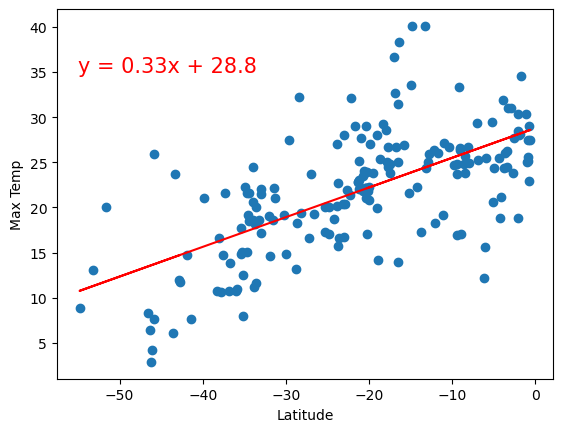

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


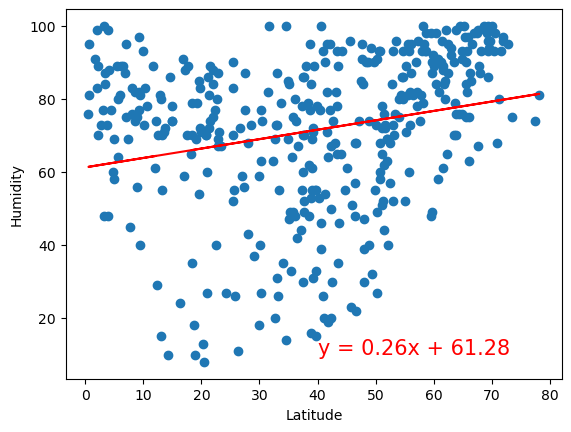

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


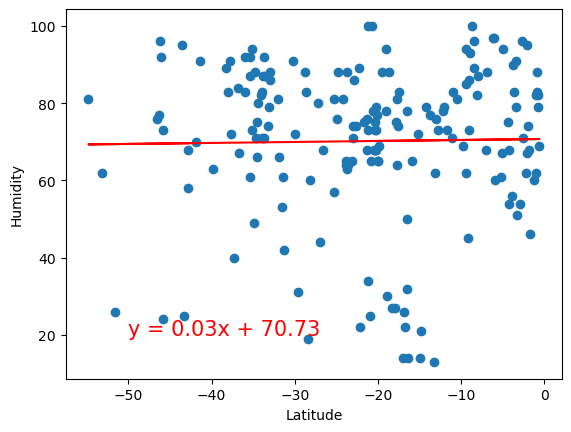

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


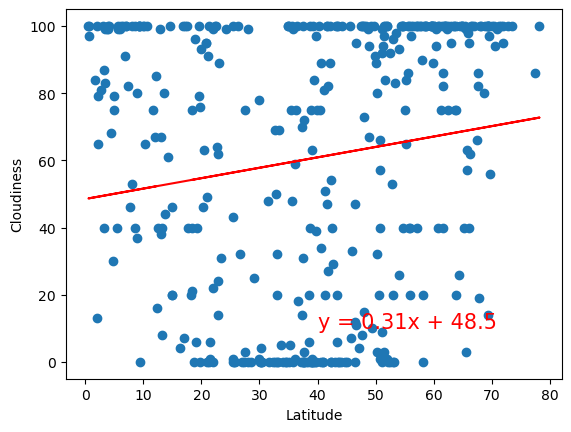

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


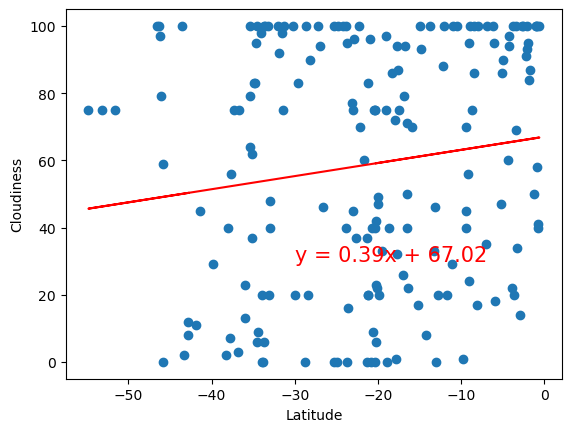

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


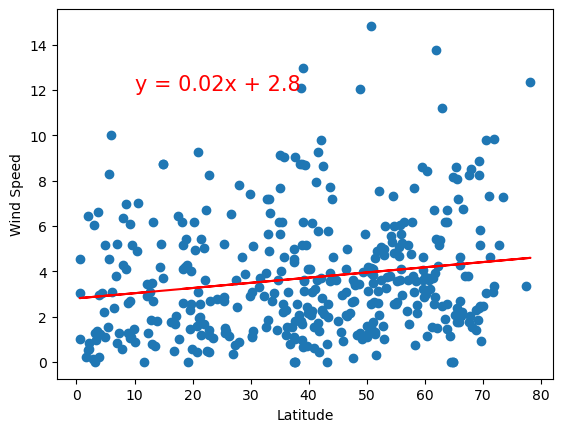

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


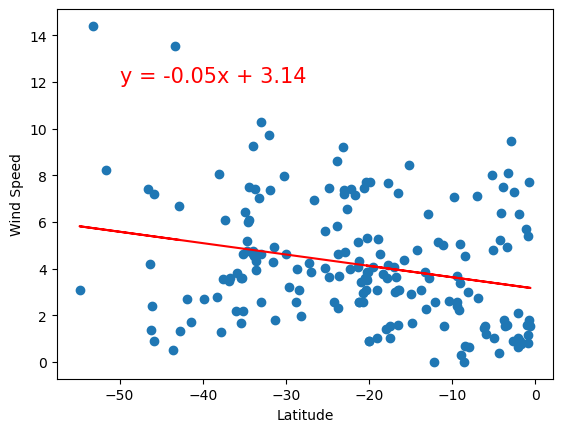

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE